In [58]:
import requests
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import tostring
import pprint
import matplotlib.pyplot as plt
import numpy as np
import BondGraphTools as bgt
from copy import copy, deepcopy


In [59]:
def moduleComb(fileName, modelName, *connections):
    f = open(fileName,'r')
    text = f.read()
    root = ET.fromstring(text)
    components = root.findall('{http://www.cellml.org/cellml/1.1#}component')
    
    # Getting the names of all the sub-systems ==> subName
    subName=[]
    for c in components:
        subName.append(c.get('name'))
    
    #number of models in the file 
    modelNum=len(components)
    #number of variables in each model 
    compNum=len(components[0])
    
    
    variables=[]
    els=[]
    init=[]
    
    for comp in components:
        variables.append(comp.findall('{http://www.cellml.org/cellml/1.1#}variable'))
 
    for var in variables:
        for v in var:
            els.append(v.attrib['name'])
            if 'initial_value' in v.attrib: # if any initial value exists take it
                init.append(v.attrib['initial_value'])    

    # Separating the groups of elements in each model
    j=0
    elements=[]
    for i in range(0,modelNum*compNum,19):    
        elements.append(els[i:i+19].copy())
        j+=1
    # Separating the groups of initial values in each model
    j=0
    init_vals=[]
    for i in range(0,modelNum*compNum,19):    
        init_vals.append(init[i:i+19].copy())
        j+=1
        
    num=len(elements[0])
    
    # assigning each element to its equivalent component in bond graphs
    x0_value=[]; x1_value=[]; x2_value=[]; x3_value=[]; x4_value=[]; x5_value=[];
    Se_value=[]; Sf1_value=[]; Sf2_value=[]; R_value=[]; R1_value=[]; R2_value=[];
    L_value=[]; L1_value=[]; L2_value=[]; C_value=[]; C1_value=[]; C2_value=[]; 
    
    for m in range(modelNum):
        for k in range(num):
            if elements[m][k]=='q':
                x0_value.append(init_vals[m][k])
            elif elements[m][k]=='q_1':
                x1_value.append(init_vals[m][k])
            elif elements[m][k]=='q_2':
                x2_value.append(init_vals[m][k])
            elif elements[m][k]=='p':
                x3_value.append(init_vals[m][k])
            elif elements[m][k]=='p_1':
                x4_value.append(init_vals[m][k])
            elif elements[m][k]=='p_2':
                x5_value.append(init_vals[m][k])
            elif elements[m][k]=='Se':
                Se_value.append(init_vals[m][k])
            elif elements[m][k]=='Sf1':
                Sf1_value.append(init_vals[m][k])
            elif elements[m][k]=='Sf2':
                Sf2_value.append(init_vals[m][k])
            elif elements[m][k]=='R':
                R_value.append(init_vals[m][k])
            elif elements[m][k]=='R1':
                R1_value.append(init_vals[m][k])
            elif elements[m][k]=='R2':
                R2_value.append(init_vals[m][k])
            elif elements[m][k]=='L':
                L_value.append(init_vals[m][k])
            elif elements[m][k]=='L1':
                L1_value.append(init_vals[m][k])
            elif elements[m][k]=='L2':
                L2_value.append(init_vals[m][k])
            elif elements[m][k]=='C':
                C_value.append(init_vals[m][k])
            elif elements[m][k]=='C1':
                C1_value.append(init_vals[m][k])
            elif elements[m][k]=='C2':
                C2_value.append(init_vals[m][k])
                
                
    model=bgt.new(name=modelName)
    Se=[]; Sf1=[]; Sf2=[]; C=[]; C1=[]; C2=[]; R=[]; R1=[]; R2=[];
    L=[]; L1=[]; L2=[];
    zero_junc_a=[]; zero_junc_b=[]; zero_junc_c=[]; one_junc_a=[]; one_junc_b=[]; one_junc_c=[];
    
    # Here by each iteration we create the BG componrnts of each model
    CBR=[]
    for m in range(modelNum):
        Se.append(bgt.new("Se", value=float(Se_value[m]), name='Se_'+str(m)))
        Sf1.append(bgt.new("Sf",value=float(Sf1_value[m]), name='Sf1_'+str(m)))
        Sf2.append(bgt.new("Sf",value=float(Sf2_value[m]), name='Sf2_'+str(m)))
        C.append(bgt.new("C", value=float(C_value[m]), name='C_'+str(m)))
        C1.append(bgt.new("C", value=float(C1_value[m]), name='C1_'+str(m)))
        C2.append(bgt.new("C", value=float(C2_value[m]), name='C2_'+str(m)))
        R.append(bgt.new("R", value=float(R_value[m]), name='R_'+str(m)))
        R1.append(bgt.new("R", value=float(R1_value[m]), name='R1_'+str(m)))
        R2.append(bgt.new("R", value=float(R2_value[m]), name='R2_'+str(m)))
        L.append(bgt.new("I", value=float(L_value[m]), name='L_'+str(m)))
        L1.append(bgt.new("I", value=float(L1_value[m]), name='L1_'+str(m)))
        L2.append(bgt.new("I", value=float(L2_value[m]), name='L2_'+str(m)))
        
        zero_junc_a.append(bgt.new("0", name='zero_junc_a_'+str(m)))
        zero_junc_b.append(bgt.new("0", name='zero_junc_b_'+str(m)))
        zero_junc_c.append(bgt.new("0", name='zero_junc_c_'+str(m)))
        one_junc_a.append(bgt.new("1", name='one_junc_a_'+str(m)))
        one_junc_b.append(bgt.new("1", name='one_junc_b_'+str(m)))
        one_junc_c.append(bgt.new("1", name='one_junc_c_'+str(m)))

    # Adding all the components to the model
    bgt.add(model,Se,Sf1,Sf2,C,C1,C2,R,R1,R2,L,L1,L2,zero_junc_a,zero_junc_b,zero_junc_c,one_junc_a,one_junc_b,one_junc_c)
    
    # By the following appending, all the same components in each model are put together
    # So we need to separate them and gather all the components of each model in a row
    CBR.append([one_junc_a,zero_junc_a,one_junc_b,zero_junc_b,one_junc_c,zero_junc_c,Se,Sf1,Sf2,
                                       R,R1,R2,C,C1,C2,L,L1,L2])  
    
    connectivity_bonds_row=[]
    for j in range(len(CBR[0][0])):
        for i in range(len(CBR[0])):
            connectivity_bonds_row.append(CBR[0][i][j])
   # Later we need to modify it to delete the unwanted components based on the inserted ports!
    
    
    connecting_models=[]
    ports=[]
    connection=list(connections)
    conIter=int(len(connection)/4)
    ConMod=[]
   # Dividing the elements in the input connections into lists with 4 elements, so each list represents ...
   # a separate connection between the modules
    for p in range(0,len(connection),4):
        ConMod.append(connection[p:p+4])
    
    # For the given inputs in connections, we assign numbers so the calculations can go on ...
    # For instance we assign {0,1,2} for {Se,Sf1,Sf2} respectively and we assign {0,1,2,...} for the model components
    for m in range(conIter):
        for i in range(0,4):
            for j in range(len(subName)):
                if ConMod[m][i]==subName[j]:
                    connecting_models.append(j)
                    if ConMod[m][i+1]=='Se':
                        ports.append(0)
                    if ConMod[m][i+1]=='Sf1':
                        ports.append(1)
                    if ConMod[m][i+1]=='Sf2':
                        ports.append(2)

    
    # Now we split the connection modules and ports two by two to specify the detailed connections:
    Con_Mod=[]
    Port_Mod=[]
    for p in range(0,len(connecting_models),2):
        Con_Mod.append(connecting_models[p:p+2])
        Port_Mod.append(ports[p:p+2])

  
    I=[]
    for i in range(len(Con_Mod)):
        for j in range(len(Con_Mod[0])):
            m=Con_Mod[i][j] # from this model number,
            p=Port_Mod[i][j] # remove this component
            I.append(modelNum*p+m)
    # The indices of the components which are supposed to be removed are now in "I"
    # If we remove the model components based on these indices, by each iteration & each removal,...
    # the number of components changes. As such, here we sort the indices in "I" so by each iteration ...
    # we just need to reduce the subjected index by "1", since each time 1 component had been removed before.
    I.sort()

    k=0
    for i in range(len(I)):
        if k==0:
            bgt.remove(model,model.components[I[i]])
            
        elif k>0:
            bgt.remove(model,model.components[I[i]-k])
        
        k+=1
    
    # Now we remove the port components from the connectivity_bonds_row
    delete=[]
    for i in range(len(Con_Mod)):
        for j in range(len(Con_Mod[0])):
            m=18*Con_Mod[i][j]+Port_Mod[i][j]+6
            delete.append(m)
    delete.sort()
    k=0
    for i in range(len(delete)):
        if k==0:
            del(connectivity_bonds_row[delete[i]])
            
        elif k>0:
            del(connectivity_bonds_row[delete[i]-k])

        k+=1
                   
    connectivity_bonds_column=connectivity_bonds_row
            

    #  connectivity matrix for one sample branching vessel
    connectivity_matrix_BV=[[0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0],
                             [0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0],
                             [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],
                             [0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
                             [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],                           
                             [0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
                             [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    
    
    
    # Now we copy the connectivity_matrix_BV for each sub-system and then remove the rows & columns ...
    # in each "Connectivity Matrix" corresponding to the port components in each sub-system
    CM={}
    delete=[]
    
    # Creating a dictionary with empty lists for adding the connectivity matrices for each sub-system
    for n in range(modelNum):
        CM[str(n)]=deepcopy(connectivity_matrix_BV)
    
        
    # Creating the combination of connection ["model"+"port"] for removing the rows/columns in the connectivity matrices
    for i in range(len(Con_Mod)):
        for j in range(len(Con_Mod[0])): 
            delete.append([Con_Mod[i][j],Port_Mod[i][j]+6])

    delete=sorted(delete, reverse=True)


    k=0
    for i in range(len(delete)): # len(delete)=4 is the number of connection ports
        m=delete[i][0]
        r=delete[i][1]
        if i==0:
            k=0
            for j in range(0,18):
                CM[str(m)][j].pop(r)    
            CM[str(m)].pop(r)
        elif i>0:
            if m==delete[i-1][0]:
                k+=1
                for j in range(0,18-k):
                    CM[str(m)][j].pop(r)              
                CM[str(m)].pop(r)
            else:
                k=0
                for j in range(0,18):
                    CM[str(m)][j].pop(r)    
                CM[str(m)].pop(r)


    Length=0
    for n in range(modelNum):
        Length+=len(CM[str(n)])
    connectivity_matrix=np.zeros((Length,Length))  

    
    k=0
    for n in range(modelNum):
        for i in range(k,k+len(CM[str(n)])):
            for j in range(k,k+len(CM[str(n)])):
                connectivity_matrix[i][j]=deepcopy(CM[str(n)][i-k][j-k])
        k+=len(CM[str(n)])  
 
    # We want to connect the created sub-systems together by inserting "1"s in the connectivity matrix
    
    Name=[]
    for i in range(len(Con_Mod)):
        for j in range(2):
            m=Con_Mod[i][j]
            p=Port_Mod[i][j]
            if p == 0:
                Name.append('one_junc_a_'+str(m))
            elif p == 1:
                Name.append('zero_junc_b_'+str(m))
            elif p == 2:
                Name.append('zero_junc_c_'+str(m))

           
    Connection_between_models=[]
    for name in Name:
        for index in range(len(connectivity_bonds_row)):
            if name == connectivity_bonds_row[index].name:
                Connection_between_models.append(index)
                break
 
    
    for i in range(0,len(Connection_between_models),2):
        II=Connection_between_models[i]
        JJ=Connection_between_models[i+1]
        connectivity_matrix[II][JJ]=1
    
    # Creating the bonds between the components based on the elements of the connectivity matrix
    Length=len(connectivity_matrix)
    bonds=[]  
    for i in range(Length):
        for j in range(Length):
            if connectivity_matrix[i][j]==1:
                bonds.append((connectivity_bonds_row[i],connectivity_bonds_column[j]))
            else:
                m=0
    
    
    # connecting the components for a bond graph representation of the system
    for head, tail in bonds:
        bgt.connect(head,tail)
        
    # Combining the initial values of the state variables

    def combineDict(*dicts):
        incKey = 0
        newDict = {}
        for dictionary in dicts:
            for val in dictionary:
                newDict['x_'+str(incKey)] = val 
                incKey+=1
        return newDict
    
    x_0=combineDict(x0_value,x1_value,x2_value,x3_value,x4_value,x5_value)

    
    return   [model,x_0]

In [60]:
[m,i]=moduleComb('branching_vessel_ex.cellml', 'Four_branching_vessels','main_1','Sf1','main_2','Se','main_1','Sf2','main_3','Se', 'main_2','Sf1','main_4','Se')

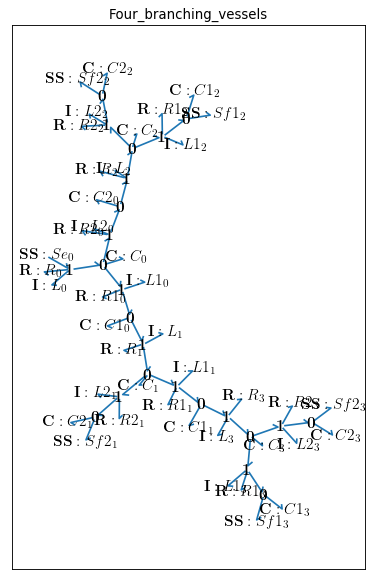

In [61]:
bgt.draw(m)

In [62]:
timespan=[0,12.5]

In [63]:
m.state_vars

{'x_0': (C: C_0, 'q_0'),
 'x_1': (C: C_1, 'q_0'),
 'x_2': (C: C_2, 'q_0'),
 'x_3': (C: C_3, 'q_0'),
 'x_4': (C: C1_0, 'q_0'),
 'x_5': (C: C1_1, 'q_0'),
 'x_6': (C: C1_2, 'q_0'),
 'x_7': (C: C1_3, 'q_0'),
 'x_8': (C: C2_0, 'q_0'),
 'x_9': (C: C2_1, 'q_0'),
 'x_10': (C: C2_2, 'q_0'),
 'x_11': (C: C2_3, 'q_0'),
 'x_12': (I: L_0, 'p_0'),
 'x_13': (I: L_1, 'p_0'),
 'x_14': (I: L_2, 'p_0'),
 'x_15': (I: L_3, 'p_0'),
 'x_16': (I: L1_0, 'p_0'),
 'x_17': (I: L1_1, 'p_0'),
 'x_18': (I: L1_2, 'p_0'),
 'x_19': (I: L1_3, 'p_0'),
 'x_20': (I: L2_0, 'p_0'),
 'x_21': (I: L2_1, 'p_0'),
 'x_22': (I: L2_2, 'p_0'),
 'x_23': (I: L2_3, 'p_0')}

In [64]:
m.constitutive_relations

[dx_0 - 813008130081301*x_12/100000000000000000000 + 115406809001731*x_16/10000000000000000000 + 2344336084021*x_20/156250000000000000,
 dx_1 - 813008130081301*x_13/100000000000000000000 + 115406809001731*x_17/10000000000000000000 + 2344336084021*x_21/156250000000000000,
 dx_2 - 813008130081301*x_14/100000000000000000000 + 115406809001731*x_18/10000000000000000000 + 2344336084021*x_22/156250000000000000,
 dx_3 - 154798761609907*x_15/50000000000000000000 + 600600600600601*x_19/100000000000000000000 + 146359312111233*x_23/20000000000000000000,
 dx_4 + 813008130081301*x_13/100000000000000000000 - 115406809001731*x_16/10000000000000000000,
 dx_5 + 154798761609907*x_15/50000000000000000000 - 115406809001731*x_17/10000000000000000000,
 dx_6 - 115406809001731*x_18/10000000000000000000 - 7998000,
 dx_7 - 600600600600601*x_19/100000000000000000000 - 6998000,
 dx_8 + 813008130081301*x_14/100000000000000000000 - 2344336084021*x_20/156250000000000000,
 dx_9 - 2344336084021*x_21/156250000000000000 

In [65]:
t, x = bgt.simulate(m, timespan=timespan, x0=i)

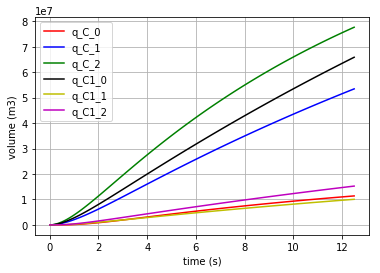

In [66]:
import matplotlib.pyplot as plt
for q, c, label in [(x[:,0],'r', 'q_C_0'), (x[:,1],'b', 'q_C_1'), (x[:,2],'g', 'q_C_2'), (x[:,3],'k', 'q_C1_0'), (x[:,4],'y', 'q_C1_1'), (x[:,5],'m', 'q_C1_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("volume (m3)") #metre3
    plt.legend(loc='upper left')
plt.grid()

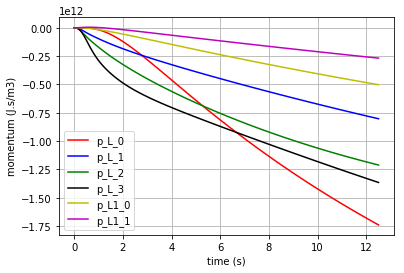

In [68]:
for p, c, label in [(x[:,12],'r', 'p_L_0'), (x[:,13],'b', 'p_L_1'), (x[:,14],'g', 'p_L_2'), (x[:,15],'k', 'p_L_3'), (x[:,16],'y', 'p_L1_0'), (x[:,17],'m', 'p_L1_1')]:
    fig=plt.plot(t,p,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("momentum (J.s/m3)") 
    plt.legend(loc='lower left')
plt.grid()